# Projeto Final | Sistema para Edição de imagens e áudios

<div style="background-color: #f2f2f2; text-align: center; padding: 10px;">
  <h3>Script para edição de imagens</h3>
</div>

%------------------------------------------------------------------------------------------------------%<br>
<br>
``Autores:`` Andrea Elias, Anthony Heimlich, Éverton Donato, Julia Midori e Luana Kruger  <br>
<br>
``Instituição:`` ADA Tech<br>
<br>
``Projeto:`` Santander Coders 2023.2<br>
<br>
``Descrição:`` Este código implementa um sistema de edição de imagens e registra informações sobre as manipulações feitas em um arquivo de log<br>
<br>
``Repositório GitHub:`` https://github.com/luana-kruger/TP-I_Santander_Coders23  <br>
<br>

%------------------------------------------------------------------------------------------------------%

## Carregar bibliotecas

In [19]:
import csv
import os

from datetime import datetime

from skimage import io
from scipy import ndimage
import PIL
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import random

import tensorflow as tf

import pathlib
import glob


c:\Users\luana\anaconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.1) or chardet (4.0.0)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


## Carregar Funções

### Função para criar ou abrir arquivo de log


In [5]:
def criar_ou_abrir_arquivo_log():

    arquivo_existe = os.path.isfile('\logs\log_image.csv')
    modo = 'a' if arquivo_existe else 'w'
    arquivo_log = open('\logs\log_image.csv', modo, newline='')
    
    return csv.DictWriter(arquivo_log, 
                          fieldnames=['Data e Hora', 'Tipo de Processamento', 'Tempo de Processamento', 
                                      'Nome do Arquivo', 'Tamanho do Arquivo', 'Resultado do Processamento', 
                                      'Mensagem de Erro']
                        )


### Função para registrar log

In [6]:
def registrar_log(arquivo_log, tipo_processamento, tempo_processamento, nome_arquivo, tamanho_arquivo, resultado, mensagem_erro):
    
    data_hora = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

    arquivo_log.writerow({'Data e Hora': data_hora, 
                          'Tipo de Processamento': tipo_processamento, 
                          'Tempo de Processamento': tempo_processamento, 
                          'Nome do Arquivo': nome_arquivo, 
                          'Tamanho do Arquivo': tamanho_arquivo, 
                          'Resultado do Processamento': resultado, 
                          'Mensagem de Erro': mensagem_erro})


### Função carregar imagem

In [8]:
def carregar_imagem(path, arquivo_log):
  
    tipo_process = 'Carregamento de Imagem'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()

        imagem = io.imread(path)

        tempo_fim = datetime.now()

        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return imagem
    
    except Exception as erro:
        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))
        return None

### Função Rotacionar imagem

In [9]:
def rotacionar(imagem, angulo, path, arquivo_log):

    tipo_process = 'Rotação de Imagem'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()
        
        imagem_rotacionada = ndimage.rotate(imagem, angulo)
        
        tempo_fim = datetime.now()

        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000
        
        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return imagem_rotacionada
    
    except Exception as erro:
        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))
        return None


### Função Inverter horizontalmente a imagem

In [10]:
def inverter_horizontalmente(imagem, path, arquivo_log):
    
    tipo_process = 'Inversão Horizontal'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()

        imagem_invertida = np.fliplr(imagem)

        tempo_fim = datetime.now()

        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return imagem_invertida
    
    except Exception as erro:
        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))
        return None

### Função Deslocar a imagem

In [11]:
def deslocar(imagem, deslocamento, path, arquivo_log):

    tipo_process = 'Deslocamento de Imagem'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB

    try:
        tempo_inicio = datetime.now()

        imagem_deslocada = ndimage.shift(imagem, deslocamento)

        tempo_fim = datetime.now()

        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return imagem_deslocada
    
    except Exception as erro:
        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))
        
        return None

### Função Zoom 

In [12]:
def zoom(imagem, fator, path, arquivo_log):

    tipo_process = 'Zoom de Imagem'
    nome_arquivo = os.path.basename(path)
    tamanho_arquivo = os.path.getsize(path) / 1024  # Tamanho em KB
    
    try:
        tempo_inicio = datetime.now()

        imagem_zoom = ndimage.zoom(imagem, fator)
        
        tempo_fim = datetime.now()

        # Tempo em milissegundos
        tempo_processamento = (tempo_fim - tempo_inicio).total_seconds() * 1000 

        registrar_log(arquivo_log, tipo_process, tempo_processamento, nome_arquivo, tamanho_arquivo, 'Sucesso', '')
        
        return imagem_zoom
    
    except Exception as erro:
        registrar_log(arquivo_log, tipo_process, None, nome_arquivo, tamanho_arquivo, 'Erro', str(erro))
        
        return None

### Função Exibir imagem

In [13]:
def exibir_imagem(imagem, titulo=''):
    plt.imshow(imagem)
    plt.title(titulo)
    plt.axis('off')
    plt.show()

## Teste

In [14]:
## Parametros

path = '.\image_test.png'
angulo = 45
deslocamento = (100, 0, 0)
fator_zoom = (0.1, 1, 1)

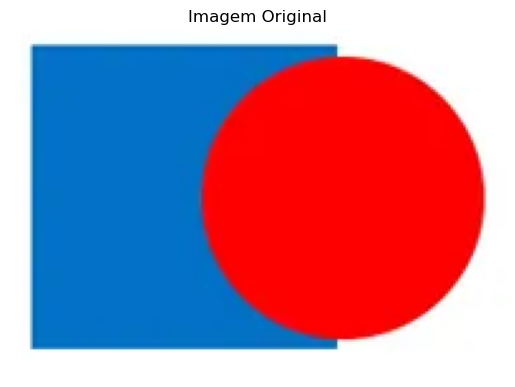

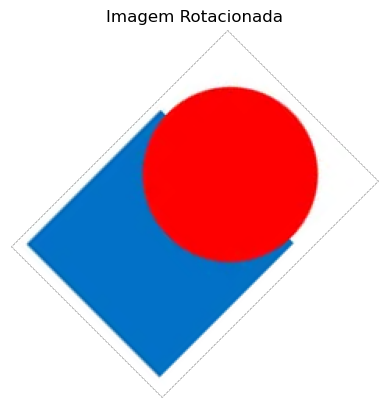

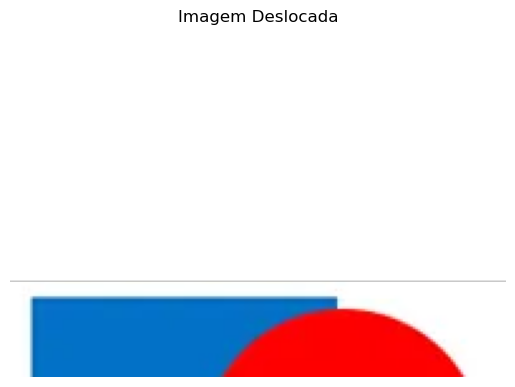

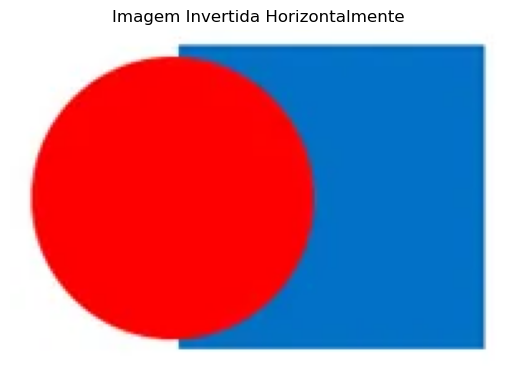

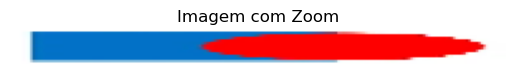

In [17]:
with open('..\logs\log_image.csv', 'w', newline='') as arquivo_log:
    writer = csv.DictWriter(arquivo_log, fieldnames=['Data e Hora', 'Tipo de Processamento', 'Tempo de Processamento', 'Nome do Arquivo', 'Tamanho do Arquivo', 'Resultado do Processamento', 'Mensagem de Erro'])
    writer.writeheader()

    imagem = carregar_imagem(path, writer)
    exibir_imagem(imagem, 'Imagem Original')

    imagem_rotacionada = rotacionar(imagem, angulo, path, writer)
    exibir_imagem(imagem_rotacionada, 'Imagem Rotacionada')

    imagem_deslocada = deslocar(imagem, deslocamento, path, writer)
    exibir_imagem(imagem_deslocada, 'Imagem Deslocada')

    imagem_invertida = inverter_horizontalmente(imagem, path, writer)
    exibir_imagem(imagem_invertida, 'Imagem Invertida Horizontalmente')

    imagem_zoom = zoom(imagem, fator_zoom, path, writer)
    exibir_imagem(imagem_zoom, 'Imagem com Zoom')

In [18]:
## Exibir arquivo de log

with open('..\logs\log_image.csv', mode='r') as file:

    csv_reader = csv.reader(file)

    for row in csv_reader:
        print(row)


['Data e Hora', 'Tipo de Processamento', 'Tempo de Processamento', 'Nome do Arquivo', 'Tamanho do Arquivo', 'Resultado do Processamento', 'Mensagem de Erro']
['2024-03-09 01:05:08', 'Carregamento de Imagem', '5.6899999999999995', 'image_test.png', '12.6689453125', 'Sucesso', '']
['2024-03-09 01:05:08', 'Rotação de Imagem', '8.127', 'image_test.png', '12.6689453125', 'Sucesso', '']
['2024-03-09 01:05:08', 'Deslocamento de Imagem', '16.258000000000003', 'image_test.png', '12.6689453125', 'Sucesso', '']
['2024-03-09 01:05:08', 'Inversão Horizontal', '0.0', 'image_test.png', '12.6689453125', 'Sucesso', '']
['2024-03-09 01:05:08', 'Zoom de Imagem', '0.0', 'image_test.png', '12.6689453125', 'Sucesso', '']


## Exemplo de uso
> Criando o arquivo ***log_image.csv*** para análise 

O código abaixo faz o download de um conjunto de dados de imagens de flores (flower_photos) de um URL fornecido (dataset_url). Ele utiliza a função `tf.keras.utils.get_file` do TensorFlow para baixar e extrair o arquivo compactado, se necessário. O caminho para o diretório onde os arquivos são salvos é retornado e armazenado na variável `data_dir`, que é convertida em um objeto `pathlib.Path` para facilitar o acesso aos arquivos.

In [20]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [22]:
## Algumas verificações 

print("Caminho do dataset de imagens: ")
print(data_dir)

print ()

print("Total de imagens do dataset: ")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

Caminho do dataset de imagens: 
C:\Users\luana\.keras\datasets\flower_photos

Total de imagens do dataset: 
3670


> Vamos usar apenas a pasta 'dandelion' do conjunto de dados flower_photos.

In [23]:
dandelion_dir = data_dir / 'dandelion/'
dandelion_dir

WindowsPath('C:/Users/luana/.keras/datasets/flower_photos/dandelion')

In [24]:
print("Total de imagens na pasta 'dandelion': ")

image_count = len(list(dandelion_dir.glob('*.jpg')))
print(image_count)

Total de imagens na pasta 'dandelion': 
898


In [25]:
# Definir lista de arquivos de entrada
fmask = str(dandelion_dir / '*.jpg')
flist = glob.glob(fmask)

O código abaixo tem como objetivo gerar um arquivo de log com várias entradas para análise posterior. Ele utiliza uma lista de parâmetros (angulos, deslocamentos, fatores_zoom) e uma lista de operações de processamento (operacoes) para aplicar transformações aleatórias em imagens.

In [26]:
# Lista de parametros
angulos = [45, 30, 15, 60, 90, 180, 'make_erro', 5, 17, 31]
deslocamentos = [(124, 0, 0), (55, 110, 0), (50, 0, 0), (150, 0, 0), (100, 50, 0), (30, 98, 0), (13, 34, 0), (190, 0, 0), 'make_erro']
fatores_zoom = [(0.2, 1, 1), (0.3, 1, 1), (0.4, 1, 1), 'make_erro', (0.6, 1, 1), (0.7, 1, 1), (0.8, 1, 1), (0.9, 1, 1), (2, 1, 1)]

# Lista de operações de processamento
operacoes = [rotacionar, inverter_horizontalmente, deslocar, zoom]

with open('..\logs\log_image.csv', 'w', newline='') as arquivo_log:
    writer = csv.DictWriter(arquivo_log, fieldnames=['Data e Hora', 'Tipo de Processamento', 'Tempo de Processamento', 'Nome do Arquivo', 'Tamanho do Arquivo', 'Resultado do Processamento', 'Mensagem de Erro'])
    writer.writeheader()

    for imagem_path in flist:

        imagem = carregar_imagem(imagem_path, writer)

        operacao = random.choice(operacoes)
        angulo = random.choice(angulos)
        deslocamento = random.choice(deslocamentos)
        fator_zoom = random.choice(fatores_zoom)

        if operacao == rotacionar:
            imagem_rotacionada = rotacionar(imagem, angulo, imagem_path, writer)

        elif operacao == inverter_horizontalmente:
            imagem_invertida = inverter_horizontalmente(imagem, imagem_path, writer)

        elif operacao == deslocar:
            imagem_deslocada = deslocar(imagem, deslocamento, imagem_path, writer)

        elif operacao == zoom:
            imagem_zoom = zoom(imagem, fator_zoom, imagem_path, writer)

In [27]:
import pandas as pd

print('Visualizando o arquivo log_image')
print()

df = pd.read_csv('..\logs\log_image.csv')
df

Visualizando o arquivo log_image



,Data e Hora,Tipo de Processamento,Tempo de Processamento,Nome do Arquivo,Tamanho do Arquivo,Resultado do Processamento,Mensagem de Erro
0,2024-03-09 01:33:25,Carregamento de Imagem,1.165,10043234166_e6dd915111_n.jpg,26.068359,Sucesso,NaN
1,2024-03-09 01:33:25,Zoom de Imagem,40.992,10043234166_e6dd915111_n.jpg,26.068359,Sucesso,NaN
2,2024-03-09 01:33:25,Carregamento de Imagem,0.000,10200780773_c6051a7d71_n.jpg,22.774414,Sucesso,NaN
3,2024-03-09 01:33:25,Deslocamento de Imagem,36.474,10200780773_c6051a7d71_n.jpg,22.774414,Sucesso,NaN
4,2024-03-09 01:33:25,Carregamento de Imagem,1.000,10294487385_92a0676c7d_m.jpg,21.147461,Sucesso,NaN
...,...,...,...,...,...,...,...
1791,2024-03-09 01:33:56,Inversão Horizontal,0.000,98992760_53ed1d26a9.jpg,87.693359,Sucesso,NaN
1792,2024-03-09 01:33:56,Carregamento de Imagem,0.000,9939430464_5f5861ebab.jpg,39.317383,Sucesso,NaN
1793,2024-03-09 01:33:56,Inversão Horizontal,0.000,9939430464_5f5861ebab.jpg,39.317383,Sucesso,NaN
1794,2024-03-09 01:33:56,Carregamento de Imagem,16.226,9965757055_ff01b5ee6f_n.jpg,41.551758,Sucesso,NaN
